In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch
import os 

In [7]:
path = './data/'
os.listdir(path)

['sydney_captions',
 'scicap_data.zip',
 'kaggle_simpsons_characters',
 'polyvore',
 'scicap',
 'fashion200k']

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)

tensor([[0.9949, 0.0051]], grad_fn=<SoftmaxBackward0>)


# Fashion200k

Number of main clothing categories: 5
Number of subcategories for jackets: 7


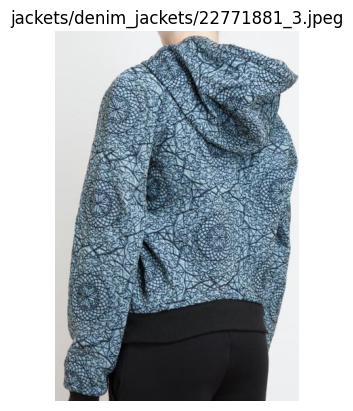

Number of images: 338339


In [5]:
path = './data/fashion200k/women/'

# First, get the main fashion categories (e.g. dresses, skirts, pants)
categories = os.listdir(path)
N = len(categories)
print('Number of main clothing categories:', N)
random_idx = np.random.randint(N) # Pick a random category
random_category = categories[random_idx]
category_path = os.path.join(path, random_category)

# List all subcategories (e.g. mini dresses, maxi dresses) for the randomly chosen category
subcategories = os.listdir(category_path)
M = len(subcategories)
print('Number of subcategories for {}: {}'.format(random_category, M))
random_idx = np.random.randint(N) # Pick a random subcategory
random_subcategory = subcategories[random_idx]
subcategory_path = os.path.join(category_path, random_subcategory)

# Get all the images belonging to the randomly chosen subcategory
images = os.listdir(subcategory_path)
random_idx = np.random.randint(len(images)) # Pick a random image
example_img = images[random_idx]
img_path = os.path.join(subcategory_path, example_img)
image = Image.open(img_path)

# Plot the random image example
plt.imshow(image)
plt.axis('off')
plt.title(img_path.replace(path, ''))
plt.show()

images = []
for (d_path, d_name, files) in os.walk(path):
    images += files
print('Number of images:', len(images))


# Polyvore

In [6]:
path = './data/polyvore/images'
image_folders = os.listdir(path)
len(image_folders)

33375

# SciCap

Caption: []
Number of captions: 333442
Train images: 106834


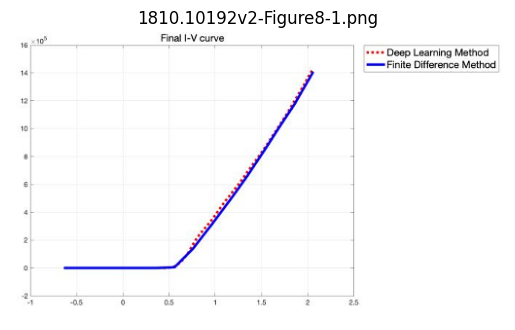

In [27]:
# Acquire all train images WITHOUT subfigures (like S-CLIP paper does)
img_path = './data/scicap/SciCap-No-Subfig-Img/train'
train_images = os.listdir(img_path)
random_idx = np.random.randint(len(train_images))
example_img = train_images[random_idx]
image = Image.open(os.path.join(img_path, example_img))

# Contains captions of all train instances (with and without subfigures)
caption_path = './data/scicap/SciCap-Caption-All/train'
train_captions = os.listdir(caption_path)
example_caption = example_img.replace('.png', '') + '.json'
with open(os.path.join(caption_path, example_caption), 'r') as f:
    data = json.load(f)
    
# Print + plot some statistics
print('Caption:', data['Img-text'])
print('Number of captions:', len(train_captions))
print('Train images:', len(train_images))
plt.imshow(image)
plt.axis('off')
plt.title(example_img)
plt.show()

# To do: remove irrelevant captions from the set of captions (i.e. those for figures with subfigures)

# Sydney captions

In [26]:
with open('./data/sydney_captions/dataset.json', 'rb') as f:
    data = json.load(f)

print('Number of images:', len(data['images']))

# Print some examples of captions
for i in range(5):
    raw_sent = [s['raw']  for s in data['images'][i]['sentences']]
    print(raw_sent)

Number of images: 613
['A residential area with houses arranged neatly .', 'A residential area with houses arranged neatly and some roads go through this area .', 'A residential area with houses arranged neatly while some roads and railways go through .', 'A residential area with houses arranged neatly while many plants on the roadside .', 'A residential area with houses arranged neatly and some railways beside .']
['Lots of houses with red and orange roofs arranged in lines .', 'A residential area with houses arranged neatly and some roads go through this area .', 'A town with many houses arranged in lines while some cars on the roads .', 'A residential area with houses arranged neatly while many plants on the roadside .', 'A residential area with houses arranged neatly .']
['Lots of houses with red and orange roofs arranged in lines .', 'A residential area with houses arranged neatly and some roads go through this area .', 'A town with many houses arranged in lines while some cars on

# ACM

# Simpsons

In [8]:
path = './data/kaggle_simpsons_characters'
os.listdir(path)

['annotation.txt',
 'characters_illustration.png',
 'kaggle_simpson_testset',
 'number_pic_char.csv',
 'simpsons_dataset',
 'weights.best.hdf5']